Case Study on Probability for Data Science

Problem Statement:

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.


Attribute Information:

• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
• bruises: bruises=t, no=f
• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
• gill-attachment: attached=a, descending=d, free=f, notched=n
• gill-spacing: close=c, crowded=w, distant=d
• gill-size: broad=b, narrow=n
• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
• stalk-shape: enlarging=e, tapering=t
• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
• veil-type: partial=p, universal=u
• veil-colour: brown=n, orange=o, white=w, yellow=y
• ring-number: none=n, one=o, two=t
• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment

In [3]:
#Reading Dataset

df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No null values detected in the dataset

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
# Changing class values to "1" and "0"s.
df["class"] = [1 if i == "p" else 0 for i in df["class"]]


# To find out which machine learning algorithm will give the best result of predicting if the mushroom is edible or poisonous (e or p) using the given dataset.

In [9]:
y = df["class"] 
x = df.drop(["class"], axis=1) 

# Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
cols=[ 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring','veil-type', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']
for i in np.arange(len(cols)):
    x[cols[i]] = label_en.fit_transform(x[cols[i]])

# Standard Scaling


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled= sc.fit_transform(x)

# SPLITING DATA INTO TRAIN AND TEST

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# 1) LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))

[[798  45]
 [ 41 741]]
accuracy is 0.947076923076923


D:\ICT\Apps\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))

[[829  14]
 [ 30 752]]
accuracy is 0.9729230769230769


# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))

[[843   0]
 [  0 782]]
accuracy is 1.0


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))

[[843   0]
 [  0 782]]
accuracy is 1.0


# K Nearest neighbour

In [26]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(2,15)
for k in neighbors : 
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test , y_pred)
    acc_values.append(acc)
    

Text(0, 0.5, 'accuracy')

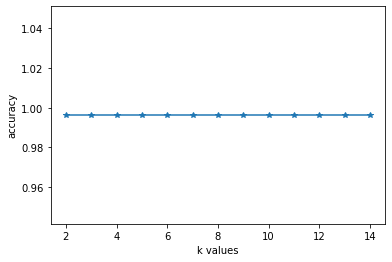

In [27]:
plt.plot(neighbors,acc_values ,'*-')
plt.xlabel('k values')
plt.ylabel('accuracy')

All Classification models performs good. Decision Tree , Random Forest gives 100% accuracy respectively

# Naïve Bayes’ Classifier

In [28]:
from sklearn.naive_bayes import GaussianNB
classifer = GaussianNB()
classifer.fit(x_train,y_train)

GaussianNB()

In [29]:
y_pred = classifer.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
cs = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(cs)
print(acc)

[[771  72]
 [ 55 727]]
0.9218461538461539


Naïve Bayes’ Classifier (Bernoulli)

In [30]:
from sklearn.naive_bayes import BernoulliNB
cla = BernoulliNB()
cla.fit(x_train,y_train)
y_pred = cla.predict(x_test)
cs = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(cs)
print(acc)

[[797  46]
 [211 571]]
0.8418461538461538


Naïve Bayes’ Classifier-Gaussian gives 91% accuracy

Conclusion :
After Studying the above data which we obtained, we can say the folllowing :

In general terms , all the Models are performing relatively well. However a few stand above the others.
The one that out shine the others are mainly 

Decision Tree Model,
Random Forest Classifier Model

Hence, we can use any of the above mentioned models to Classify the Mushrooms as Edible or Poisonous.